# Алгоритмы и структуры данных



## Как решать алгоритмические задачи

1. **Прочитайте условие и обратите внимание на**:
    - то, что нужно найти
    - ограничения на входные данные
    - что дано на вход и в каком формате
    - лимиты по скорости и памяти.
2. **Теперь придумайте пример**:
    - возьмите пример из условия задачи
    - придумайте свой пример
    - если возможно, визуализируйте пример.
3. **Напишите наивный алгоритм так, чтобы он был понятен школьнику. Если это не
   получилось**: - расскажите, как вы находите ответ для данных из примера - введите дополнительные ограничения на входные данные - уменьшите объём входных данных - попробуйте поочерёдно применить уже изученные алгоритмы и структуры дан-
   ных.
4. **Оцените сложность алгоритма: укладывается ли ваш алгоритм в лимиты?**
    - укладывается по времени
    - укладывается по памяти.
5. **Подумайте над более эффективной реализацией:** - проверьте код на наличие bottleneckов - удалите ненужные действия - проверьте структуры данных - проверьте отсутствие повторяющейся работы - найдите компромисс между временем и памятью, учитывая заданные ограничения
   на входные данные и лимиты.
6. **Напишите аккуратный код. Обратите внимание на:**
    - имена переменных
    - имена функций
    - codestyle вашего языка.
7. **Перечитайте код и проверьте:**
    - условные выражения
    - условия выхода из циклов и функций
    - константы.
8. **Протестируйте свой код как хакер. Используйте:**
    - минимальный пример
    - максимальный по условию задачи пример
    - пример, содержащий особые случаи для конкретного типа данных.


In [92]:
# !pip install matplotlib


In [93]:
import random
import math

import matplotlib.pyplot as plt
import numpy as np

from util.util import timer, function_timer


In [94]:
# random.seed(1123123)

def gen_rand(nums, amp):
    rand = []
    for _ in range(nums):
        val = int(math.cos(_/50) * amp * random.random())
        rand.append(val)
    return rand


rand = gen_rand(1000, 100)


#### Функция map()

Встроенная функция `map(function, iterable)` применяет функцию `function` ко всем элементам итерируемого объекта `iterable`.
Как результат функция `map()` возвращает `объект` типа `map`. Этот объект — последовательность, элементы которой — результат применения `function` к элементам `iterable`. Объект map можно преобразовать, например, в список или иную коллекцию.

Задачу, которую решает функция `map()`, можно было бы решить с помощью цикла, но код будет неудобным и громоздким, да и выполняться он будет дольше.


In [95]:
def double(num):
    return num * 2


def make_map(arr):
    return list(map(double, arr))


rand_2 = make_map(rand)

Задачу, которую решает функция `map()`, можно было бы решить с помощью цикла, но код будет неудобным и громоздким, да и выполняться он будет дольше.


In [96]:
def make_map_slow(arr):
    result = []
    for i in arr:
        result.append(double(i))
    return result


rand_2 = make_map_slow(rand)


#### Метод скользящего среднего

Для решения этой задачи можно применить [метод скользящего среднего](https://en.wikipedia.org/wiki/Moving_average). С его помощью можно снизить шумы в данных и сгладить график, выделив общую тенденцию изменения числа запросов.

Метод заключается в том, что создаётся новый массив данных, и в нём значение каждой точки высчитывается как среднее арифметическое предыдущих _K_ значений из исходного набора.

То есть для каждой секунды посчитаем среднее арифметическое от количества запросов за предыдущие _K_ секунд. Этот интервал _K_ будем называть «окном сглаживания». На каждой итерации он смещается, «скользит» — отсюда и название метода.
Например, если данные по нагрузке на сайт для 7 секунд будут такие: `[4,3,8,1,5,6,3][4, 3, 8, 1, 5, 6, 3][4,3,8,1,5,6,3]`, а _K=3K_, то сглаженные значения получатся следующими: `[5,4,4.67,4,4.67][5, 4, 4.67, 4, 4.67][5,4,4.67,4,4.67]`.
Обратите внимание, что в результирующем массиве будет на _K−1_ элементов меньше: мы не считаем среднее арифметическое меньше чем для _K_ элементов.

![img03](https://pictures.s3.yandex.net/resources/S8_02_Gallery3_1636540070.png)


In [97]:

def moving_average(timeseries, K):
    result = []  # Пустой список.
    for begin_index in range(0, len(timeseries) - K):
        end_index = begin_index + K
        # Просматриваем окно шириной K.
        current_sum = 0
        for v in timeseries[begin_index:end_index]:
            current_sum += v
        current_avg = current_sum / K
        result.append(current_avg)
    return result


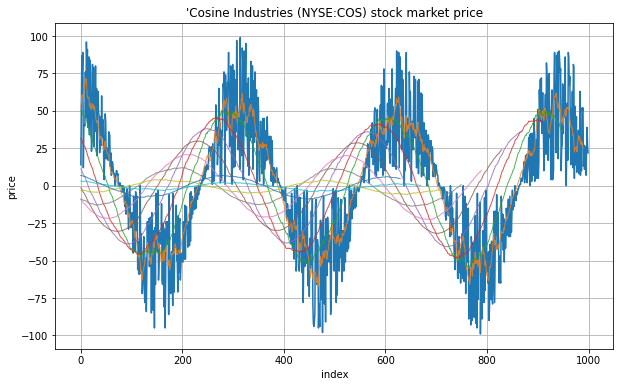

In [98]:
plt.rcParams["figure.figsize"] = [10, 6]

plt.clf()


plt.plot(rand)
for k in range(10, 400, 40):
    avg = moving_average(rand, k)
    plt.plot((avg), alpha=0.8, linewidth=1)

plt.title("'Cosine Industries (NYSE:COS) stock market price")
plt.xlabel('index')
plt.ylabel('price')
plt.grid()

plt.show()


#### Скорость работы наивного алгоритма

Посмотрим, насколько эффективно работает функция `moving_average()`.

Пусть длина входного списка с данными будет равна $N$, а окно сглаживания — $K$. В коде есть два вложенных цикла:

-   внешний выполняет ровно $N−K+1N-K+1N−K+1$ итераций;
-   внутренний выполняет $K$ итераций на каждой из $N−K+1N-K+1N−K+1$ итераций внешнего цикла.

Получается, общее число операций в циклах будет равно $N×K−K2+KN\times$ $K-K^2+KN×K−K2+K$. Поскольку в нашем случае NNN сильно больше $K$, частью $K2+K^2+K2+K$ в этом выражении можно пренебречь и считать число операций примерно равным $N×KN \times KN×K$.

> 💡 Если величина $X$ сильно больше величины $Y$, то это можно обозначить так: $X>>YX >> YX>>Y$. Можно также сказать, что $Y$ сильно меньше $X: Y<<XY << XY<<X$. Это значит, что Y настолько мало по сравнению с $X$, что в задаче можно считать величину $YX\frac{Y}{X}XY$​ равной нулю. Из этого, в частности, следует, что $X−YX-YX−Y$ приблизительно равно $X$.

$N×K$ операций в функции — это много или мало?

Логи могут храниться довольно долгое время, и это не просто так: часто возникает необходимость посмотреть динамику данных за месяц, квартал или даже год. Допустим, нужно обработать данные за 30 дней с окном сглаживания в один час:

$N=30×24×60×60=2592000$ — это длина входного списка.

$K=60×60=3600K=60\times 60=3600$ — окно сглаживания.

Количество операций можно посчитать так:
$N×K=9331200000N$

Примерно столько операций придётся совершить, чтобы обработать данные за месяц. В зависимости от языка программирования такая программа будет выполняться от нескольких десятков секунд до нескольких десятков минут. А если увеличить размер окна, то ещё дольше.


#### B. Застёжка-молния


In [99]:

def ziper(arr1, arr2):
    arr = []
    for x, y in zip(arr1, arr2):
        arr.extend([x, y])
    # return arr
    return " ".join(list(map(str, arr)))


result = ziper(rand, rand)


In [100]:

def moving_average2(timeseries, K):
    result = []  # Пустой массив.
    # Первый раз вычисляем значение честно и сохраняем результат.
    current_sum = sum(timeseries[0:K])
    result.append(current_sum / K)
    for i in range(0, len(timeseries) - K):
        current_sum -= timeseries[i]
        current_sum += timeseries[i+K]
        current_avg = current_sum / K
        result.append(current_avg)
    return result


In [101]:
res = moving_average(rand, 1000)
res = moving_average2(rand, 1000)
# result = moving_average(arr, k)


### 2-SUM

**Наивный алгоритм**

Начнём с наивного решения. Самое простое, что можно придумать, — перебрать все возможные пары блинов и для каждой пары проверить, равен ли её вес искомому.

> 💡 Именно с наивного алгоритма рекомендуется начинать решение любой задачи, в том числе и на собеседованиях. Если от вас захотят получить более эффективное решение — вам скажут об этом явно.

Катя возьмёт первый блин и по очереди примерит его к остальным. Если ничего не подойдёт, вернёт первый блин на место, возьмёт следующий и повторит те же действия. Поиск будет продолжаться до тех пор, пока девушка не найдёт нужную пару блинов.
Однако даже в таком простом варианте есть нюансы. Пусть исходный массив будет `[2, 1, 3, 5, 5], а X = 4`. В этом случае, если итерация будет происходить по индексам, алгоритм вернёт `1, 3`. Если же итерироваться по значениям, то легко допустить ошибку, при которой алгоритм вернёт `2, 2`, хотя второй двойки в массиве нет.


In [102]:
def twosum(numbers, X):
    for i in range(0, len(numbers)):
        for j in range(i+1, len(numbers)):
            if numbers[i] + numbers[j] == X:
                return numbers[i], numbers[j]
    # По условию задачи пара обязательно должна найтись.
    # Но предусмотрительность не помешает:
    # если пара не найдена - вернём None, None (или можно выкинуть exception).
    return None, None


#### Скорость работы наивного алгоритма

Посчитаем максимально возможное количество операций.
На первой итерации Катя возьмёт первый блин и проверит, подходит ли к нему в пару какой-то из остальных. Их количество равно $N - 1$ в коде это соответствует первой итерации внешнего цикла: при `i == 0` индекс `j` проходит значения от $1$ до $N - 1$ включительно, в общей сложности $N - 1$.

На каждой следующей итерации `i` увеличивается на единицу, а, значит, индекс `j` проходит на одну итерацию меньше, чем на предыдущей.

Получается, общее число операций будет $(N−1)+(N−2)+(N−3) +…+2+1$. Для наглядности представим этот процесс в виде схемы.

Каждая закрашенная клетка на иллюстрации — это одна операция сравнения. Количество таких полей составляет примерно половину площади квадрата со стороной NNN. Значит, в худшем случае Кате придётся сделать примерно $N2/2N ^ 2$ попыток.

![](https://pictures.s3.yandex.net/resources/S0_04_1-1_1636552265.png)

Площадь фигуры равна $N$ в квадрате, закрашенная область занимает примерно половину.

Если блины будут лежать как попало (говорят «в среднем случае» или просто «в среднем»), то Кате нужно будет сделать вдвое меньше сравнений, примерно $N2/4N^2/4N2/4$. И в среднем, и в худшем случаях зависимость числа операций от числа элементов в массиве описывается квадратичной функцией.

> 💡 Квадратичная функция — это функция вида $f(x)=ax2+bx+c(x)$, где $a$, $b$ и $с$ — это числа. Название функции связано с тем, что главный элемент такой суммы — это $x^2$ с некоторым коэффициентом. Главный он потому, что при больших xxx остальные элементы окажутся сильно меньше и не сыграют заметной роли; в итоге значение функции будет приблизительно равно $ax^2$.
> В рассуждении выше $N2/4$ — это квадратичная функция с коэффициентами $a=1/4, b=0, c=0$.

График зависимости времени работы функции от числа элементов — это парабола, график квадратичной функции.

![](https://pictures.s3.yandex.net/resources/-_1636552378.png)


In [103]:
# def in_put():
#     n = int(input())
#     n1 = list(map(int, input().split()))
#     n2 = int(input())
#     return n, n1, n2

# n, n1, n2 = in_put()


### Naive 2-Sum algorithm


In [104]:

@function_timer(range(5, 100, 1), 'X')
def two_sum_naive(numbers, X):
    for i in numbers:
        for j in numbers:
            if int(i) + int(j) == X:
                return i, j
    return None


@function_timer(range(5, 100, 1), 'X')
def twosum_with_sort(numbers, X):
    numbers.sort()
    left = 0
    right = len(numbers) - 1
    while left < right:
        current_sum = numbers[left] + numbers[right]
        if current_sum == X:
            return numbers[left], numbers[right]
        if current_sum < X:
            left += 1
        else:
            right -= 1
    return None


@function_timer(range(5, 100, 1), 'X')
def twosum_extra_ds(numbers, X):
    previous = set()
    for A in numbers:
        Y = X - A
        if Y in previous:
            return A, Y
        else:
            previous.add(A)

    if len(previous) == 0:
        return None


value = 80
rand = gen_rand(100000, 100)

result1, bench1 = two_sum_naive(numbers=rand, X=None)
result2, bench2 = twosum_with_sort(numbers=rand, X=None)
result3, bench3 = twosum_extra_ds(numbers=rand, X=None)

print(result1, result2, result3)


Finished 'two_sum_naive' in 0.00216 secs with 95 iterations
Finished 'twosum_with_sort' in 0.21559 secs with 95 iterations
Finished 'twosum_extra_ds' in 0.56334 secs with 95 iterations
(62, 37) (0, 99) (50, 49)


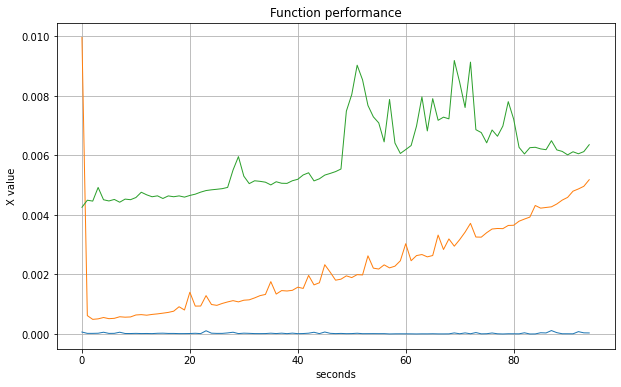

In [105]:
plt.clf()

plt.plot((bench1), alpha=1, linewidth=1)
plt.plot((bench2), alpha=1, linewidth=1)
plt.plot((bench3), alpha=1, linewidth=1)

plt.title("Function performance")
plt.xlabel('seconds')
plt.ylabel('X value')
plt.grid()

plt.show()


### Как решать алгоритмические задачи.

Часто можно встретить мнение: «Я прочитаю условие задачи, потом посмотрю каноничное решение и запомню его». Увы, так не работает. В поведенческой экономике есть такое понятие, как «Эффект Икеа». Люди ценят больше то, к созданию чего приложили руку и много усилий. То же самое и с алгоритмическими задачами — мы ценим и лучше запоминаем те, которые придумали, а иногда выстрадали сами. Время, проведённое за решением, поможет в дальнейшем легче находить паттерны в новых задачах. Воспринимайте сложности в процессе решения задач как вызов, который сделает вас ощутимо сильнее.

#### Последовательность решения алгоритмических задач

1. Внимательно прочитайте условие задачи:
    - зафиксируйте, что нужно найти
    - отметьте все особенности входных данных
    - ознакомьтесь с лимитами по времени и памяти.

Бóльшая часть деталей в условиях задач даны не просто так — они важны для решения, на что-то влияют, как-то помогают. Исключения бывают, но встречаются редко.

2. Придумайте примеры входных данных и зарисуйте, если это возможно. В задачах нашего курса всегда будет пара примеров для понимания условия. Допишите ещё и ответьте на вопрос: «Достаточно ли примеров получилось?» О том, как придумывать хорошие тесты, поговорим подробнее в одном из следующих уроков.
3. На примерах разберите, как вы находили бы ответ на заданный вопрос, если бы вам потом не надо было писать код. Подумайте, какой результат работы своей программы вы ожидаете при обработке каждого набора входных данных. Запишите, как именно находите ответ, какие формулы используете для промежуточных вычислений. Возможно, вы делите входные данные друг на друга, сортируете массив или вычисляете какие-то вспомогательные данные?

Правильный результат на этом этапе — решение, которое легко объяснить школьнику. В нём не встречаются сложные слова и высокоуровневые абстракции.
Алгоритм, который первым приходит на ум, называется наивным. Во многих случаях он будет неоптимальным. Не пропускайте формулирование наивного алгоритма, даже если вы понимаете, что он работает очень медленно. Подумайте, чем конкретно плох алгоритм. Он работает медленно? Ему требуется много дополнительной памяти?

Часто бывает так, что придумать алгоритм не получилось. На этот случай есть 5 советов, как подступиться к задаче:

-   Предположите, какие дополнительные ограничения бы вам помогли. Если в задаче дана последовательность произвольных чисел, попробуйте решить задачу, например, для последовательности только из целых чисел, а потом переходите к вещественным числам
-   Попробуйте решить задачу для входных данных небольшого размера. Например, 3 числа в последовательности вместо 200.
-   Подумайте, можете ли вы разбить задачу на подзадачи меньшего размера. Например, если у вас есть массив длины nnn и требуется найти максимальный элемент, что будет, если поделить массив на две равные части? Зная ответ для каждой половины, можно ли получить ответ для целого массива? А если просто убрать один элемент? Аналогично можно работать и с числами, и со строками, обрезать и делить их, находить решение для меньшей задачи, после чего пытаться перейти от решения на меньшем объёме входных данных к решению на большем объёме.
-   Предположите, какие из известных вам алгоритмов и структур данных могут помочь в решении задачи. Пока мы будем учиться, задачи будут соответствовать темам из спринта. Чтобы после обучения было удобно пользоваться этим методом, заведите список пройденных тем. Собственный конспект — лучшая подсказка.
-   Возьмите какое-то решение, пусть даже вы не уверены в его правильности. Проверьте его на примерах, которые вы придумали. В каких ситуациях ваш алгоритм даст неправильные ответы? Проанализировав неправильное решение, можно найти и исправить ошибки.

Если решение найти не удалось, не стесняйтесь написать в Slack — расскажите, что попробовали сделать, какие были идеи и почему они вам не нравятся. Задавая вопросы и обсуждая задачу с наставниками и сокурсниками, вы сможете лучше разобраться в материале.
Продолжим разбирать последовательность проработки задачи. На прошлом шаге мы придумали алгоритм и записали его в форме, понятной школьнику.

1. Оцените сложность, с которой работает ваш наивный алгоритм. Проверьте, это достаточно хорошая сложность с учётом известных ограничений на входные данные или лимиты не покорятся? Попробуйте обосновать, какая асимптотика вашего алгоритма.
2. Оптимизируйте! Подумайте, как можно улучшить свой алгоритм. Есть несколько способов:

-   **Bottleneck или Бутылочные горлышко**. Как мы уже говорили, так называют самое узкое место программы. Это та часть, которая работает дольше всего. Если у вас есть часть кода, которая работает за квадратичное время, а весь остальной код — за линейное, ищите, можно ли ускорить квадратичную часть. Ведь небольшие изменения в линейной части не дадут асимптотических преимуществ и в большинстве случаев ускорят программу незначительно.
-   **Повторяющаяся работа**. Например, вам надо ответить на один и тот же вопрос для 10 разных элементов массива. Вы знаете, что ответ можно быстро найти на отсортированном массиве. Лучше отсортировать массив один раз в начале, чем делать это каждый раз для каждого из 10 элементов. Чтобы заметить повторяющиеся действия, ищите одинаковые куски кода и внимательно посмотрите все инструкции, которые выполняются в теле каждого цикла вашей программы. Может быть, некоторые инструкции стоит вынести за пределы цикла
-   **Ненужные действия**. Иногда сортировать не нужно. Например, программе на вход подаются числа и надо найти наименьшее число. Можно массив отсортировать и выдать первый элемент, а можно в процессе считывания перевыбирать минимум. Или вам надо сложить числа в двоичной системе счисления — тогда ни к чему переводить числа в десятичную систему счисления, а потом сумму обратно в двоичную. Проверьте, нет ли у вас лишних действий.
-   **Оптимальные структуры данных**. Ответьте на вопрос, какие операции с данными предстоит осуществлять? Какая структура данных позволит сделать это быстро, без лишних издержек? Может быть, вы хотите быстро узнавать, есть ли элемент в вашем наборе данных, но используете для этого массив?

Подумайте, всю ли информацию из условия задачи вы уже применили. Может, есть ограничение, которое вы проигнорировали в наивном решении. Перечитайте условие ещё раз.

Ищите компромисс между памятью и временем. В задачах контеста у вас будет два типа ограничений: на дополнительную память и на время выполнения программы. Иногда мы можем ускорить программу, сохранив промежуточную информацию. В других случаях, как в задаче про счастливые билеты, лучше сэкономить память.


![Тип тестов](https://pictures.s3.yandex.net/resources/3_1_1606158365.png)